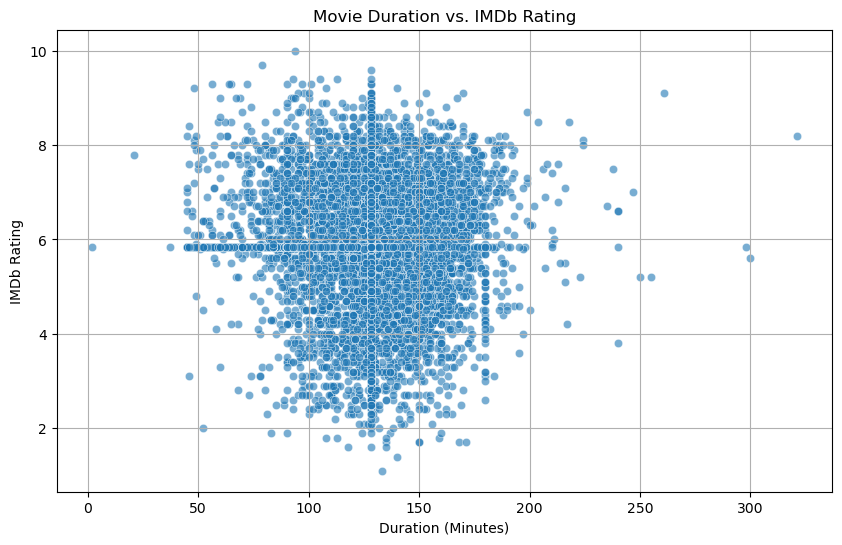

Year with the Best Average Rating: 1917.0
Correlation between Movie Length and Rating: -0.014920549454734186


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\nsukh\Downloads\archive (3)\IMDb Movies India.csv'  # Update this path
movies_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Data Cleaning
movies_data['Year'] = movies_data['Year'].str.extract(r'(\d{4})').astype(float)
movies_data['Duration'] = movies_data['Duration'].str.replace(' min', '').astype(float)
movies_data['Rating'] = movies_data['Rating'].astype(float)

# Correct handling of the 'Votes' column to remove any non-numeric characters and convert to float
movies_data['Votes'] = movies_data['Votes'].astype(str)  # Ensure all entries are strings
movies_data['Votes'] = movies_data['Votes'].str.replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
movies_data['Votes'] = movies_data['Votes'].replace('', np.nan)  # Replace empty strings with NaN
movies_data['Votes'] = movies_data['Votes'].astype(float)  # Convert to float
movies_data['Votes'].fillna(movies_data['Votes'].mean(), inplace=True)  # Fill NaNs with the mean

movies_data['Duration'].fillna(movies_data['Duration'].mean(), inplace=True)
movies_data['Rating'].fillna(movies_data['Rating'].mean(), inplace=True)

# Analysis: Year with the Best Average Rating
best_year = movies_data.groupby('Year')['Rating'].mean().idxmax()

# Correlation between Movie Length and Rating
correlation = movies_data[['Duration', 'Rating']].corr().loc['Duration', 'Rating']

# Visualization: Movie Duration vs. Rating Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_data, x='Duration', y='Rating', alpha=0.6)
plt.title('Movie Duration vs. IMDb Rating')
plt.xlabel('Duration (Minutes)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

# Print out the analysis results
print(f"Year with the Best Average Rating: {best_year}")
print(f"Correlation between Movie Length and Rating: {correlation}")

# Ensure to update 'file_path' with the actual path to your dataset.
